# Week 3: Calculus (cont'd)

In [1]:
# Load libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns

## Day 1: Integral Calculus
* In calculus, integrals are the opposite of derivatives: they "reverse" the effects of differentiation. In this context we speak about **indefinite integrals**
* Additionally, integrals can be used to calculate the area of a figure bound by graphs of functions. In context of this problem (finding the **Area Under a Curve**) we spreak about **definite integrals**
* The outcome of an indefinite integral is a function; the outcome of a definite integral is a number

## Indefinite integrals
* First we talk about indefinite integrals. Since these integrals undo differentiations, sometimes they are called **antiderivatives**
* For example: we figure out that, if the derivative is $2x$, then the *original* function is $x^2$. The original function is not as obvious in general.
* Indefinite integrals are important for us since they enable us to solve definite integrals; the definite integrals are fundamental in probability theory.
* If $f(x)$ is a given function, then its indefinite integral (antiderivative) is labeled by $F(x)$. The relation between $F$ and $f$ is:
\begin{equation}
F'(x) = f(x),
\end{equation}
but we usually write this relation as:
\begin{equation}
\int f(x)\, dx = F(x) + C
\end{equation}
where $C$ is some constant called *integration constant* (at the moment, not relevant for us). For the time being, ignore the $dx$ term in the integral.

### Example 1
* Let $f(x) = x^2$. Find the indefinite integral of $f(x)$

In [2]:
# Define variables and functions
x = sp.symbols('x')
f = sp.Function('f', real=True)
F = sp.Function('F', real=True)
f = x**2 

# Integrate
F = sp.integrate(f, x)
F

x**3/3

### Example 2
* Let $g(x) = \sqrt{x}$. Find the indefinite integral $\int g(x)\, dx$

In [3]:
g = sp.Function('g', real=True)
G = sp.Function('G', real=True)

g = sp.sqrt(x)
G = sp.integrate(g, x)
G

2*x**(3/2)/3

### Example 3
* Calculate:
\begin{equation}
\int \left( \ln x - e^x + x^2\sin x \right) \, dx
\end{equation}

In [4]:
sp.integrate(sp.ln(x) - sp.exp(x) + x**2 * sp.sin(x), x)

-x**2*cos(x) + x*log(x) + 2*x*sin(x) - x - exp(x) + 2*cos(x)

### Example 4: Not all integrals exist
* Try calculating:
\begin{equation}
\int \sin\left(\cos x \right) \, dx
\end{equation}
* In short: there is not function $F(x)$ such that $F'(x) = \sin\left(\cos x \right)$

In [5]:
sp.integrate(sp.sin(sp.cos(x)), x)

Integral(sin(cos(x)), x)

## Definite integrals
* Definite integrals can be thought of as **area under a curve (AUC)** over a certain interval, provided the function is not negative.
* In this sense, the definite integrals describe **accumulation**
* The exact area under the graph of a function $f$ over an interval $[a, b]$ is denoted by the definite integral:
\begin{equation} \int_a^b f(x)\, dx  \end{equation}
* Let's see how definite integrals are defined through an example: calculate the area under the graph of the function $f(x) = \frac{1}{1 + x^2}$ over the interval $[-1, 3]$


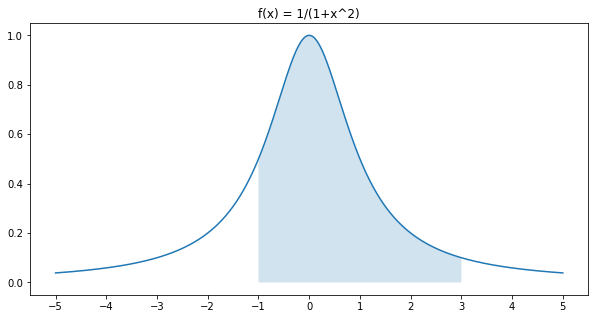

In [6]:
f = 1/(1+x**2)
F = sp.integrate(f, x)

f = sp.lambdify(x, f)
F = sp.lambdify(x, F)



xs = np.linspace(-5, 5, 1000)
ys = f(xs)

plt.figure(figsize=(10, 5))
plt.plot(xs,ys)

Xs = np.linspace(-1,3, 100)
Ys = f(Xs)
plt.fill_between(Xs,Ys, alpha=0.2)

plt.xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]);
plt.title('f(x) = 1/(1+x^2)')

plt.show()

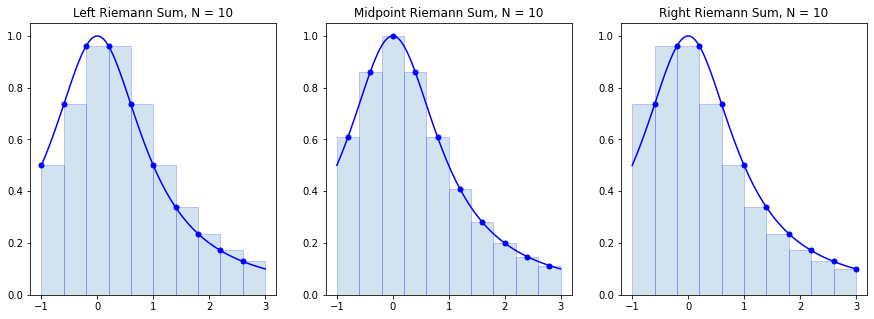

In [7]:
a = -1
b = 3
N = 10 # Number of subintervals to use
n = 10 # Use n*N+1 points to plot the function smoothly

x = np.linspace(a, b, N+1)
y = f(x)

X = np.linspace(a, b, n*N+1)
Y = f(X)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(X, Y, 'b') # The function plot
x_left = x[:-1] # Left endpoints
y_left = y[:-1]
plt.plot(x_left, y_left,'b.', markersize=10)
plt.bar(x_left, y_left, width=(b-a)/N, alpha=0.2, align='edge', edgecolor='b')
plt.title(f'Left Riemann Sum, N = {N}')

plt.subplot(1, 3, 2)
plt.plot(X, Y,'b')
x_mid = (x[:-1] + x[1:])/2 # Midpoints
y_mid = f(x_mid)
plt.plot(x_mid, y_mid, 'b.', markersize=10)
plt.bar(x_mid, y_mid, width=(b-a)/N, alpha=0.2, edgecolor='b')
plt.title(f'Midpoint Riemann Sum, N = {N}')

plt.subplot(1,3,3)
plt.plot(X,Y,'b')
x_right = x[1:] # Left endpoints
y_right = y[1:]
plt.plot(x_right, y_right, 'b.', markersize=10)
plt.bar(x_right, y_right, width=-(b-a)/N, alpha=0.2, align='edge', edgecolor='b')
plt.title(f'Right Riemann Sum, N = {N}')

plt.show()

### Example 5: Approximation using midpoints
* Approximate the area under the graph of $f(x)$ over the interval $[-1, 3]$ using the midpoints

In [8]:
# Approximate the integral using the mid-point sum with N subintervals
x = sp.symbols('x')
f = 1/(1 + x**2)
f_lam = sp.lambdify(x, f)

a = -1
b = 3
N = 10 # Number of subintervals to use

xs = np.linspace(a, b, N + 1) #the division of the interval [a, b]

approx = 0 #initiate the approximation

for i in range(N):
    mid_point = (xs[i] + xs[i+1])/2
    height = f_lam(mid_point)
    width = xs[i+1] - xs[i]
    approx = approx + width*height

print('Area is ~ ', approx)

Area is ~  2.038174493665297


* Write a function that will take as inputs: a function $f$, the endpoints $a$ and $b$ of the interval $[a, b]$, and the number of subintervals $N$ in the division. The function should return the approximate area under the graph of $f(x)$ over the interval $[a, b]$.

In [9]:
def approx_AUC(func, a, b, N):
    approx = 0
    xs = np.linspace(a, b, N + 1)
    for i in range(N):
        approx += func((xs[i] + xs[i+1])/2)*(xs[i+1] - xs[i])
    return approx

approx_AUC(f_lam, -1, 3, 100)

2.0344812689478817

## The Fundametal Theorem of Calculus
* This theorem gives a complete relation between derivatives and integrals and allows for an exact calculation of definite integrals, and hence of area under a curve.
* Let $f(x)$ be a function defined and "well-behaved" over an interval $[a, b]$, and let $F(x)$ be any of its antiderivatives. Then:
\begin{equation}
\int_a^b f(x) \, dx = F(b) - F(a)
\end{equation}
* To obtain an expression of $F(x)$, we just solve:
\begin{equation}
F(x) = \int f(x) \, dx
\end{equation}

### Example 6: caclulating the exact area
* Find the exact area under the graph of $f(x) = \frac{1}{1+x^2}$ over $[-1, 3]$

In [10]:
sp.integrate(f, x).subs(x, 3) - sp.integrate(f, x).subs(x, -1)

pi/4 + atan(3)

### Example 7
* Calculate the area under the graph of $g(x) = 4-x^2$ over the interval $[-2, 2]$

In [11]:
sp.integrate(4 - x**2, x).subs(x, 2) - sp.integrate(4 - x**2, x).subs(x, -2)

32/3

### Example 8: use sympy.integrate(f, (x, a, b))
* SymPy has in integrated command that calculates the definite inegral of a function over an integral, if possible. If it cannot find an antiderivative, then we can approximate the integral with a high degree of accuracy.

Calculate:
* $\int_0^{\pi} \sin x \, dx$
* $\int_1^4 \ln x \, dx$
* $\int_{-10}^{10} e ^{-x^2} \, dx$
* $\int_{-\pi/4}^{\pi/2} \sin \left( \cos x \right) \, dx$

In [12]:
# Fist example
print(sp.integrate(sp.sin(x), (x, 0, sp.pi)))

# Second example
print(sp.integrate(sp.ln(x), (x, 1, 4)).evalf())

# Third example
print(sp.integrate(sp.exp(-x**2), (x, -10, 10)).evalf())

# Fourth example
print(sp.integrate(sp.sin(sp.cos(x)), (x, -sp.pi/4, sp.pi/2)).evalf())

2
2.54517744447956
1.77245385090552
1.50627665614154


## Definite integrals as net change
* If the rate of change of a certain process is known (i.e. described by a function), then we can calculate the net change as an integral of the rate.
* Examples of rates of changes:
  * Water flowing into/out of a tank
  * Velocity (rate of change of position)
  * Variable force doing some work
* Frequently these are functions of time $t$


### Example 9. Water flowing out of a tank
Water leaks from a tank at a rate of $L(t) =2 + 5t$ liters/hour, where $t$ is the number of hours after 7:00.
* How much water is lost between 9:00 and 11:00?
* If the tank had 500 liters or water at 7:00, how much water is left in the tank at noon?
* If the tank had 500 liters or water at 7:00, at what time will all the water drain?


In [13]:
# Define variables and functions
t = sp.symbols('t', positive=True)
L = sp.Function('L', real=True)
L = 2 + 5*t

# How much water is lost between 9:00 and 11:00?
ans_a = sp.integrate(L, (t, 2, 4))
print(f'Between 9:00 (t = 2) and 11:00 (t = 4) {ans_a} liters of water are lost')

# If the tank had 500 liters or water at 7:00, how much water is left in the tank at noon?
ans_b = 500 - sp.integrate(L, (t, 0, 5))
print(f'At noon (t = 5), there are {ans_b.round(2)} liters of water left in the tank')

# If the tank had 500 liters or water at 7:00, at what time will all the water drain?
# At this time 500 liters will have drained
Q = sp.Function('Q', real=True) # Quantity of water that has drained by time t
Q = sp.integrate(L, (t, 0, t)) # it turns out you can use t as the variable, no need to define T as a new variable!

eq = sp.Eq(Q, 500) # define the equation object Q(t) = 0

ans_c = sp.solve(eq, t)[0] #solve the equation for t

print(f'The tank will be empty at t = {ans_c.round(2)} or at ~20:45')

Between 9:00 (t = 2) and 11:00 (t = 4) 34 liters of water are lost
At noon (t = 5), there are 427.50 liters of water left in the tank
The tank will be empty at t = 13.75 or at ~20:45


### Practice example
The rate at which rainwater flows into a drainpipe is modeled by the function $R(t) = 20 \sin⁡ \left(\frac{t^2}{35}\right)$ cubic feet per hour, $t$ is measured in hours, and $0 \leqslant t \leqslant 8$.

The pipe is partially blocked, allowing water to drain out the other end of the pipe at a rate modeled by $D(t) = −0.04t^3 + 0.4t^2 + 0.96t$ cubic feet per hour, for $0 \leqslant t \leqslant 8$.

There are 30 cubic feet of water in the pipe at time $t=0$.

* How much water flows into the pipe between the second and fourth hours?
* How much water drains out of the pipe during the first half of the period?
* If the drainpipe can hold maximum of 100 cubic feet of water, will it overflow at the end of the 8-th hour?


Between t = 2 and t = 4 a total 10.49 liters of water flow into the drainpipe
In the first half od the period (t = 0 to t = 4), a total of 13.65 liters drain out
At the end of the 8-th hour, there will be 48.54 liters of water in the drain, so it will not overflow


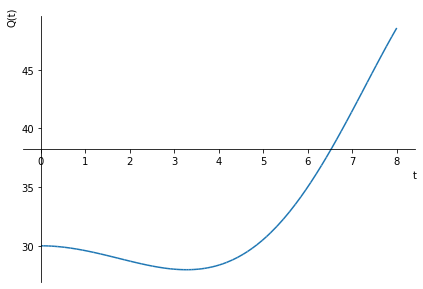

In [14]:
# Define variables
t = sp.symbols('t', positive=True)

# Define R
R = sp.Function('R', real=True)
R = 20 * sp.sin(t**2/35)

# Define D
D = sp.Function('T', real=True)
D = -0.04*t**3 + 0.4*t**2 + 0.96*t



# How much water flows into the pipe between the second and fourth hours?
ans_a = sp.integrate(R, (t, 2, 4))
print(f'Between t = 2 and t = 4 a total {ans_a.round(2)} liters of water flow into the drainpipe')

# How much water drains out of the pipe during the first half of the period?
ans_b = sp.integrate(D, (t, 0, 4))
print(f'In the first half od the period (t = 0 to t = 4), a total of {ans_b.round(2)} liters drain out')

# If the drainpipe can hold maximum of 100 cubic feet of water, will it overflow at the end of the 8-th hour?
Q = sp.Function('Q', real=True) # Quantity of water in the drainpipe at time t
Q = 30 + sp.integrate(R, (t, 0, t)) - sp.integrate(D, (t, 0, t))
print(f'At the end of the 8-th hour, there will be {Q.subs(t, 8).round(2)} liters of water in the drain, so it will not overflow')
sp.plot(Q, (t, 0, 8), ylabel='Q(t)')